In [24]:
import MMGPD
from src.GPD.initializeAnalysis import Initialize 
import src.GPD.dataGenerator as dG
import numpy as np
import matplotlib.pyplot as plt


In [25]:
MMGPD.listAnalysis()

['Analysis2', 'HGAG23']


In [26]:
myAnalyze = Initialize("HGAG23")


LHAPDF 6.5.4 loading /opt/homebrew/anaconda3/envs/MMGPDs/share/LHAPDF/NNPDF40_nlo_as_01180/NNPDF40_nlo_as_01180_0000.dat
NNPDF40_nlo_as_01180 PDF set, member #0, version 1; LHAPDF ID = 331700
LHAPDF 6.5.4 loading /opt/homebrew/anaconda3/envs/MMGPDs/share/LHAPDF/NNPDFpol11_100/NNPDFpol11_100_0000.dat
NNPDFpol11_100 PDF set, member #0, version 1; LHAPDF ID = 251000


In [27]:
myAnalyze[0]

'HGAG23'

In [29]:
myAnalyze[1]

PDF<NNPDF40_nlo_as_01180/0, central, LHAPDF ID=331700; 11 flavors, x > 1.0e-09, Q2 < 1.0e+10 GeV2>

In [30]:
myAnalyze[2]

PDF<NNPDFpol11_100/0, central, LHAPDF ID=251000; 11 flavors, x > 1.0e-05, Q2 < 1.0e+05 GeV2>

In [31]:
MMGPD.xGPD(myAnalyze, "Set9", "H" , "uv", 0.25, 0)

0.6394071738064703

In [32]:
MMGPD.G_A( myAnalyze, "Set9" , 0,1e-6)

/Users/apranikstar/Downloads/MMGPDLib-main-2/MMGPD.py:42: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(GAintegrand, 1e-15, 1, args=(t, InitlizerArgs, analysisSet,),  epsabs=percision, epsrel=percision) [0]


1.2676213724441845

In [33]:
-dG.genSkewedData(10,30,100,2)

array([-10.0001088 , -10.00065518, -10.00739953, -10.01765403,
       -10.03028931, -10.05317214, -10.08555034, -10.14621284,
       -10.18762796, -10.21757608, -10.26405655, -10.3092052 ,
       -10.38425008, -10.47132496, -10.47612448, -10.50365533,
       -10.63721087, -10.64539795, -10.7596279 , -11.08416166,
       -11.12508858, -11.21272203, -11.220388  , -11.37228526,
       -11.50408316, -11.52962092, -11.57512068, -12.03664056,
       -12.2412397 , -12.3766088 , -12.39398737, -12.64156738,
       -12.72961847, -12.75147191, -13.17780389, -13.32219612,
       -13.34917407, -13.45518361, -13.46401121, -13.52489802,
       -13.5413775 , -13.64550543, -14.05499103, -14.21152432,
       -14.51530149, -14.57493961, -14.9419405 , -15.26191253,
       -15.28478181, -15.43636982, -15.72567669, -15.74641323,
       -15.87051542, -15.87354628, -16.05240672, -16.36781636,
       -16.41421801, -16.52380903, -16.70017155, -16.7545132 ,
       -17.44600338, -18.10210762, -18.16637758, -18.50

In [37]:
t_values = -dG.genSkewedData(0,5,100,2)  # 100 points between -5 and -0.1
GAT = [MMGPD.G_A( myAnalyze, "Set9" , t,1e-9) for t in t_values]

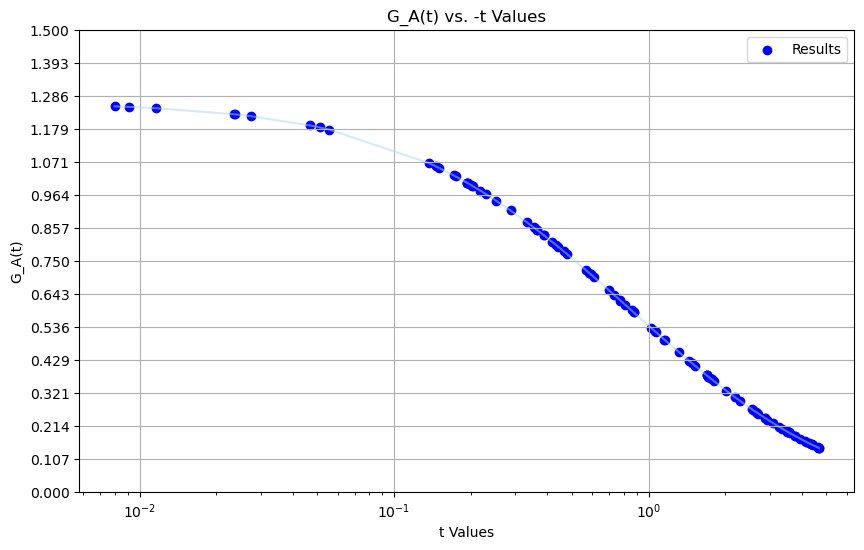

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(-t_values, GAT, color='blue', label='Results')
plt.plot(-t_values, GAT, color='lightblue', alpha=0.5)  # Optional line connecting the points
plt.title('G_A(t) vs. -t Values')
plt.xscale('log')
plt.xlabel('t Values')
plt.yticks(np.linspace(0, 1.5, 15))
plt.ylabel('G_A(t)')
plt.legend()
plt.grid()
plt.show()